In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#Load the simulated data
df_sim = pd.read_csv('../data/student_health_data.csv')

Success!
Current Columns: ['student_id', 'age', 'gender_bin', 'heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'stress_biosensor', 'stress_self_report', 'physical_activity', 'sleep_hours', 'mood', 'study_hours', 'project_hours', 'health_risk_level', 'biosensor_label']


<Figure size 800x600 with 0 Axes>

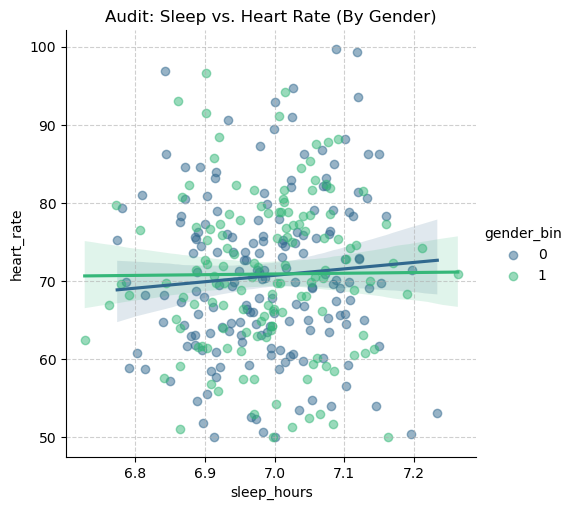

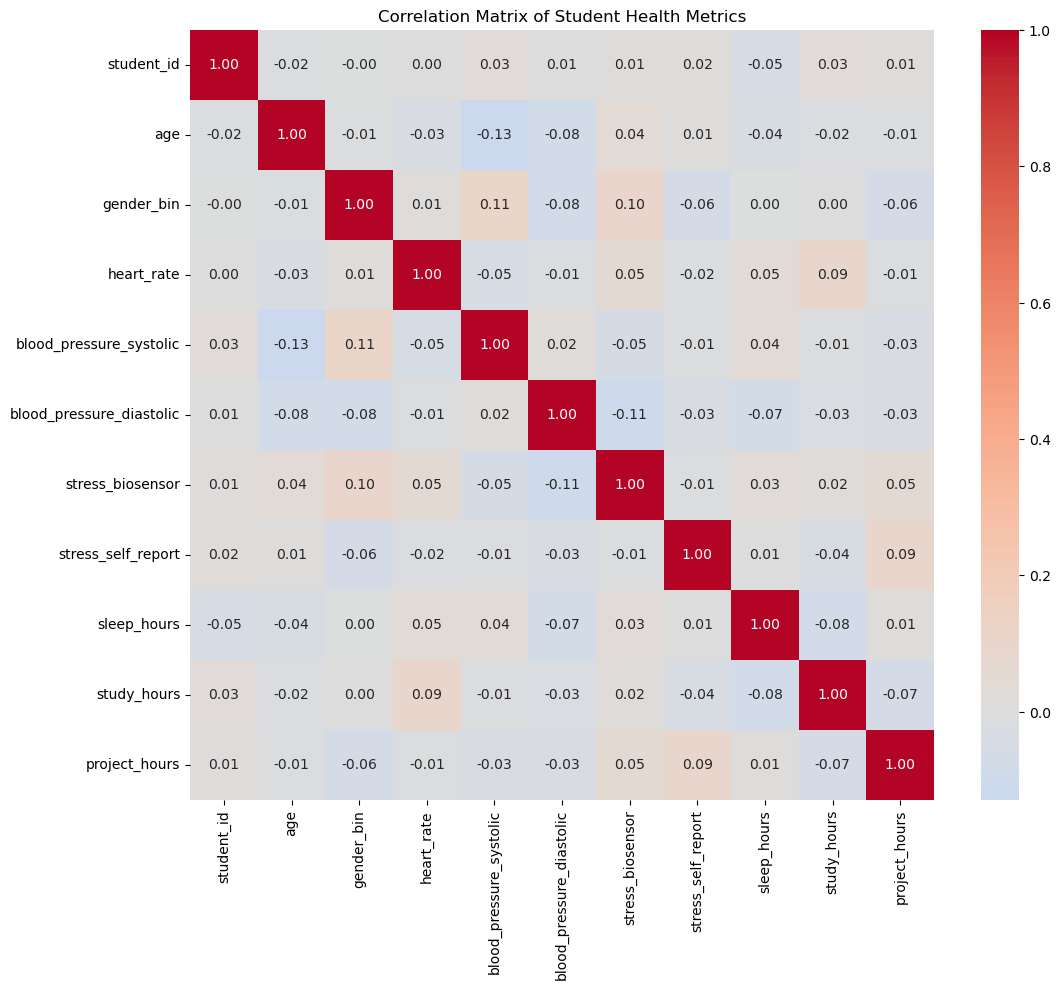

Success! Correlation between Sleep and HR: 0.0467
All systems go!
Test: Sleep hours now range from nan to nan


In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load the simulated data
df_sim = pd.read_csv('../data/student_health_data.csv')

#make all column text lower-cased.
df_sim.columns = [col.lower().replace(' ', '_') for col in df_sim.columns]

#Rename Logic (fixed dictionary syntax)
mapping = {
    'stress_level_biosensor': 'stress_biosensor',
    'stress_level_self_report': 'stress_self_report',
    'sleep_duration': 'sleep_hours',
    'hours_of_sleep': 'sleep_hours',
    'sleep_quality': 'sleep_hours',
    'gender': 'gender_bin',
    'heart_rate': 'heart_rate'
}
df_sim.rename(columns=mapping, inplace=True)

#Mirror MIT: 0 = Male, 1 = Female
if 'gender_bin' in df_sim.columns:
    gender_map = {'Male': 0, 'Female': 1, 'M': 0, 'F': 1, 'male': 0, 'female':1}
    df_sim['gender_bin'] = df_sim['gender_bin'].map(gender_map).fillna(0).astype(int)

#Create labels
def categorize_stress(score):
    if isinstance(score,str):
        return score
    try:
        score = float(score)
        if score >= 7: return 'High'
        elif score >= 4: return 'Medium'
        else: return 'Low'
    except (ValueError, TypeError):
        return 'Low'
    
#Apply Mapping (verify column exists first)
if 'stress_biosensor' in df_sim.columns:
    df_sim['biosensor_label'] = df_sim['stress_biosensor'].apply(categorize_stress)
        
print ("Success!")
print (f"Current Columns: {df_sim.columns.tolist()}")

#Verify gender counts
df_sim['gender_bin'].value_counts()

#Gender count returns nearly "perfect split"

#Convert text-based sleep quality to numbers for plotting.
if 'sleep_hours' in df_sim.columns:
    #check if the column contains strings like 'Moderate'
    if df_sim['sleep_hours'].dtype == 'object':
        sleep_map = {'Low': 4, 'Moderate': 7, 'High': 9}
        df_sim['sleep_hours'] = df_sim['sleep_hours'].map(sleep_map).fillna(df_sim['sleep_hours'])
    
    #Converts any 'object' sleep_hours values to numeric for plotting in seaborn
    df_sim['sleep_hours'] = pd.to_numeric(df_sim['sleep_hours'], errors='coerce')
#NEWCODE: Using numpy to add the tiniest bit of random variety using a random number generator.
    #Prevents the 'stacked' line at 7.0 that caused the NaN error.
    df_sim['sleep_hours'] = df_sim['sleep_hours'] + np.random.normal(0, 0.1, size=len(df_sim))

#Converts any 'object' heart_rate values to numeric for plotting in seaborn
if 'heart_rate' in df_sim.columns:
    df_sim['heart_rate'] = pd.to_numeric(df_sim['heart_rate'], errors='coerce')

#Drops missing values to keep the dataset clean for comparison
df_sim.dropna(subset=['sleep_hours', 'heart_rate'], inplace=True)

#BIAS AUDIT: Sleep vs. Heart Rate
#Checks synthetic data for linear relationsips
if 'sleep_hours' in df_sim.columns and 'heart_rate' in df_sim.columns:
    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df_sim,
        x='sleep_hours',
        y='heart_rate',
        hue='gender_bin',
        palette='viridis',
        scatter_kws={'alpha':0.5}
)
    plt.title('Audit: Sleep vs. Heart Rate (By Gender)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#Correlation Heatmap
numeric_df = df_sim.select_dtypes(include=['float64', 'int64'])
if not numeric_df.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Student Health Metrics')
    plt.show()

#Calculate correlation 
if 'sleep_hours' in df_sim.columns and 'heart_rate' in df_sim.columns:
    correlation = df_sim[['sleep_hours', 'heart_rate']].corr().iloc[0,1]
    print(f"Success! Correlation between Sleep and HR: {correlation:.4f}")
    print("All systems go!")
else:
    print("Error: Required columns not found.")

#Makes sure values are numeric types to prevent NaN errors in comparison
df_sim['sleep_hours'] = pd.to_numeric(df_sim['sleep_hours'], errors='coerce').round(0)

sim_sleep_conversion = {1: 4, 2: 5, 3: 7, 4: 8, 5: 9}
df_sim['sleep_hours'] = df_sim['sleep_hours'].map(sim_sleep_conversion)

df_sim['sleep_hours'] = df_sim['sleep_hours'] + np.random.normal(0, 0.1, size=len(df_sim))

#Tests: Should show 4.0 - 9.0
print(f"Test: Sleep hours now range from {df_sim['sleep_hours'].min()} to {df_sim['sleep_hours'].max()}")





In [16]:
#Saves ONLY the table of data to CSV file
df_sim.to_csv('sim_cleaned_data.csv', index=False)
print("Success! Your clean data has been saved as a CSV file in your Project Folder!")


Success! Your clean data has been saved as a CSV file in your Project Folder!
